<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('2013_Prep.csv')

In [3]:
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,357,27,1007,76,25,79,Summer,1/1/2013 5:57,24,0.209397,5.996345
1,358,27,1007,76,25,83,Summer,1/1/2013 5:58,26,0.209397,5.996345
2,359,27,1007,76,25,84,Summer,1/1/2013 5:59,23,0.279196,7.995127
3,360,27,1007,76,25,86,Summer,1/1/2013 6:00,24,2.150208,5.601483
4,361,27,1007,76,25,88,Summer,1/1/2013 6:01,25,1.026060,2.819078
...,...,...,...,...,...,...,...,...,...,...,...
157790,437982,25,1010,65,22,21,Spring,11/12/2013 18:30,6,-7.853017,-1.526472
157791,437983,25,1010,65,22,19,Spring,11/12/2013 18:31,6,-13.119296,-7.272144
157792,437984,25,1010,65,22,19,Spring,11/12/2013 18:32,4,-10.495436,-5.817715
157793,437985,24,1010,65,22,18,Spring,11/12/2013 18:33,4,-7.714506,-4.635343


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157795 entries, 0 to 157794
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   157795 non-null  int64  
 1   TS1_SENS0700_TmpMdul_C_data  157795 non-null  int64  
 2   Barometer_data               157795 non-null  int64  
 3   Outside_Humidity_data        157795 non-null  int64  
 4   Outside_Temperature_data     157795 non-null  int64  
 5   Solar_Radiation_data         157795 non-null  int64  
 6   season                       157795 non-null  object 
 7   Date_time                    157795 non-null  object 
 8   TS1_P1_data                  157795 non-null  int64  
 9   Wx                           157795 non-null  float64
 10  Wy                           157795 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 13.2+ MB


In [5]:
df['Date_time'] = pd.to_datetime(df['Date_time'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f8f62bb0>,
      dtype=object)

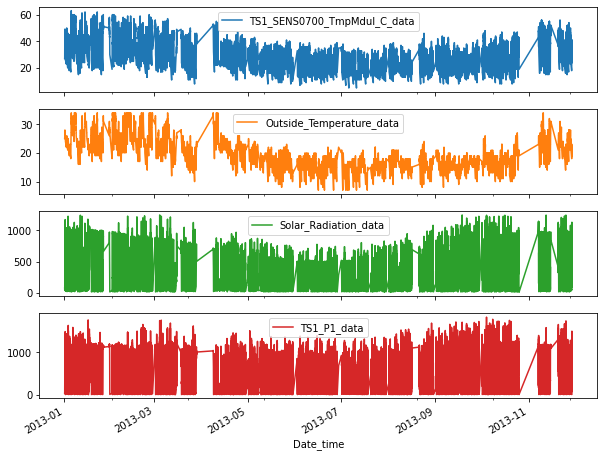

In [6]:
df.set_index('Date_time')[['TS1_SENS0700_TmpMdul_C_data', 'Outside_Temperature_data','Solar_Radiation_data','TS1_P1_data']].plot(subplots=True)

In [7]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'Date_time', 'TS1_P1_data', 'Wx',
       'Wy'],
      dtype='object')

In [8]:
df=df[::5]
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,357,27,1007,76,25,79,Summer,2013-01-01 05:57:00,24,0.209397,5.996345
5,362,27,1007,76,25,90,Summer,2013-01-01 06:02:00,25,2.052121,5.638156
10,367,27,1007,76,26,95,Summer,2013-01-01 06:07:00,30,1.530904,10.892949
15,372,28,1007,75,26,105,Summer,2013-01-01 06:12:00,41,0.209397,5.996345
20,377,28,1007,75,26,123,Summer,2013-01-01 06:17:00,46,-1.041889,5.908847
...,...,...,...,...,...,...,...,...,...,...,...
157770,437960,32,1010,63,23,60,Spring,2013-11-12 18:08:00,454,-18.895916,1.986041
157775,437965,31,1010,63,23,51,Spring,2013-11-12 18:13:00,396,-13.993915,-7.756954
157780,437971,28,1010,64,22,39,Spring,2013-11-12 18:19:00,176,-9.428840,-5.665419
157785,437977,27,1010,65,22,28,Spring,2013-11-12 18:25:00,34,-20.128094,-13.071337


In [9]:
date_time = pd.to_datetime(df.pop('Date_time'), format='%d/%m/%Y %H:%M')
date_time

0        2013-01-01 05:57:00
5        2013-01-01 06:02:00
10       2013-01-01 06:07:00
15       2013-01-01 06:12:00
20       2013-01-01 06:17:00
                 ...        
157770   2013-11-12 18:08:00
157775   2013-11-12 18:13:00
157780   2013-11-12 18:19:00
157785   2013-11-12 18:25:00
157790   2013-11-12 18:30:00
Name: Date_time, Length: 31559, dtype: datetime64[ns]

In [10]:
import pandas as pd
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [11]:
import numpy as np
day = 24*60*5
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

<ipython-input-11-1fe7526918b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [12]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [13]:
df_input =df[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [14]:
df_input.shape

(31559, 12)

In [15]:
df_input= df_input.loc[df['TS1_P1_data']<=1150]

In [16]:
df_input.shape

(27872, 12)

In [17]:
df_input= df_input.loc[df['TS1_P1_data']>50]

In [18]:
df_input.shape

(25770, 12)

In [19]:
df_input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.031467,-1.403141
TS1_SENS0700_TmpMdul_C_data,0.426890,-0.191975
Barometer_data,0.114855,-0.540674
Outside_Humidity_data,-0.215190,-0.383934
Outside_Temperature_data,0.511456,-0.131246
Solar_Radiation_data,0.674746,-0.251554
Wx,0.142171,-0.190387
Wy,-0.082364,-0.115218
Day sin,-0.018908,-1.501590
Day cos,-0.024510,-1.500089


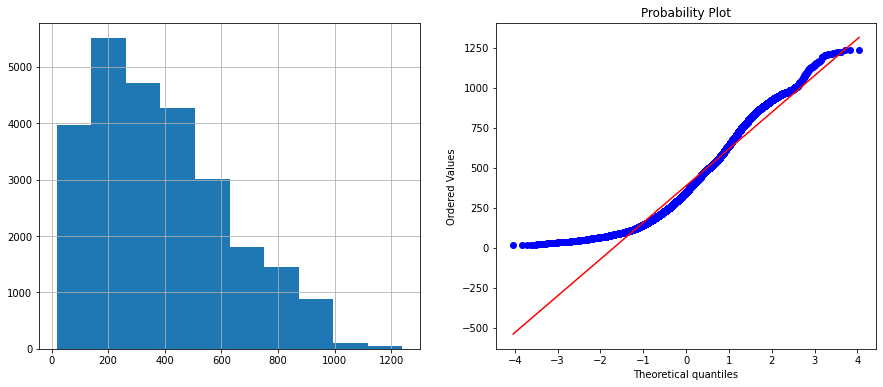

In [20]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df_input,'Solar_Radiation_data')

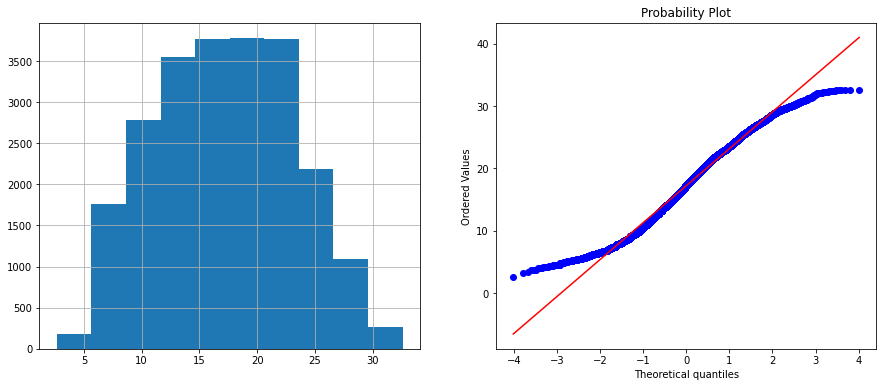

In [ ]:
df_input['Solar_Radiation_data_SQ']=df_input.Solar_Radiation_data**(1/2)
diagnostic_plots(df_input,'Solar_Radiation_data_SQ')

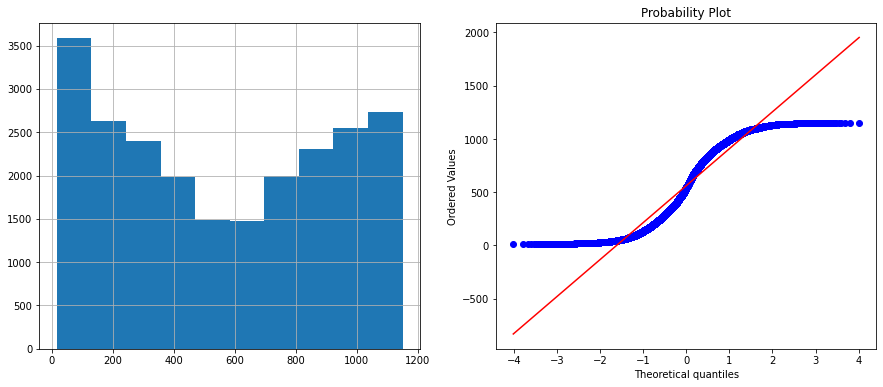

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df_input,'TS1_P1_data')

In [21]:
df_input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.031467,-1.403141
TS1_SENS0700_TmpMdul_C_data,0.426890,-0.191975
Barometer_data,0.114855,-0.540674
Outside_Humidity_data,-0.215190,-0.383934
Outside_Temperature_data,0.511456,-0.131246
Solar_Radiation_data,0.674746,-0.251554
Wx,0.142171,-0.190387
Wy,-0.082364,-0.115218
Day sin,-0.018908,-1.501590
Day cos,-0.024510,-1.500089


In [24]:
df_input =df_input[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [25]:
df_input

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos
25,52,28,1007,75,26,163,-0.156434,0.987688,0.913545,0.406737,0.172084,0.985082
30,51,28,1007,75,26,181,0.951057,0.309017,0.987688,0.156434,0.172790,0.984959
35,52,28,1008,74,26,60,-0.121869,0.992546,0.994522,-0.104528,0.173496,0.984835
40,60,28,1008,74,26,54,5.248472,6.037677,0.933580,-0.358368,0.174202,0.984710
45,72,28,1008,74,26,234,4.363287,7.871577,0.809017,-0.587785,0.174908,0.984585
...,...,...,...,...,...,...,...,...,...,...,...,...
157760,556,33,1010,62,23,91,-3.018838,-2.624236,-0.104528,0.994522,0.624294,-0.781190
157765,503,32,1010,63,23,74,-13.991472,0.488593,0.156434,0.987688,0.623734,-0.781637
157770,454,32,1010,63,23,60,-18.895916,1.986041,0.406737,0.913545,0.623173,-0.782084
157775,396,31,1010,63,23,51,-13.993915,-7.756954,0.629320,0.777146,0.622612,-0.782530


In [26]:
df_input.describe()

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos
count,25770.000000,25770.000000,25770.000000,25770.000000,25770.000000,25770.000000,25770.000000,25770.000000,2.577000e+04,2.577000e+04,25770.000000,25770.000000
mean,617.132247,31.684517,1015.539232,61.972332,20.191929,387.695537,0.047019,2.184068,7.805256e-03,1.242132e-02,0.018836,-0.072785
std,351.320880,9.847924,5.864990,16.722749,5.324959,235.538789,7.820346,6.312362,7.072854e-01,7.068033e-01,0.736913,0.671822
min,51.000000,5.000000,1002.000000,15.000000,7.000000,18.000000,-23.482776,-14.184194,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,291.000000,25.000000,1011.000000,51.000000,17.000000,195.000000,-5.563103,-0.836228,-7.071068e-01,-7.071068e-01,-0.769366,-0.722647
50%,631.000000,31.000000,1015.000000,63.000000,19.000000,346.000000,-0.000000,1.908090,6.625043e-11,1.004488e-10,0.122587,-0.119371
75%,949.000000,38.000000,1019.000000,74.000000,23.000000,534.000000,5.633659,6.359031,7.071068e-01,7.071068e-01,0.751969,0.578476
max,1150.000000,63.000000,1030.000000,97.000000,34.000000,1239.000000,23.070281,18.912258,1.000000e+00,1.000000e+00,1.000000,1.000000


In [27]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [28]:
data_scaled

array([[9.09918107e-04, 3.96551724e-01, 1.78571429e-01, ...,
        7.03368322e-01, 5.86042203e-01, 9.92541107e-01],
       [0.00000000e+00, 3.96551724e-01, 1.78571429e-01, ...,
        5.78217233e-01, 5.86395226e-01, 9.92479307e-01],
       [9.09918107e-04, 3.96551724e-01, 2.14285714e-01, ...,
        4.47735768e-01, 5.86748204e-01, 9.92417254e-01],
       ...,
       [3.66696997e-01, 4.65517241e-01, 2.85714286e-01, ...,
        9.56772729e-01, 8.11586561e-01, 1.08958039e-01],
       [3.13921747e-01, 4.48275862e-01, 2.85714286e-01, ...,
        8.88572981e-01, 8.11306189e-01, 1.08734800e-01],
       [1.13739763e-01, 3.96551724e-01, 2.85714286e-01, ...,
        7.72319517e-01, 8.10969532e-01, 1.08467178e-01]])

In [29]:
features=data_scaled
target=data_scaled[:,0]

In [30]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[9.09918107e-04, 3.96551724e-01, 1.78571429e-01, 7.31707317e-01,
          7.03703704e-01, 1.18755119e-01, 5.01070029e-01, 4.58414155e-01,
          9.56772729e-01, 7.03368322e-01, 5.86042203e-01, 9.92541107e-01],
         [0.00000000e+00, 3.96551724e-01, 1.78571429e-01, 7.31707317e-01,
          7.03703704e-01, 1.33497133e-01, 5.24859895e-01, 4.37908290e-01,
          9.93844170e-01, 5.78217233e-01, 5.86395226e-01, 9.92479307e-01]]]),
 array([0.00090992]))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [32]:
x_train.shape

(20616, 12)

In [33]:
x_test.shape

(5154, 12)

In [34]:
win_length=720
batch_size=32
num_features=12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [35]:
train_generator[0]

(array([[[9.09918107e-04, 3.96551724e-01, 1.78571429e-01, ...,
          7.03368322e-01, 5.86042203e-01, 9.92541107e-01],
         [0.00000000e+00, 3.96551724e-01, 1.78571429e-01, ...,
          5.78217233e-01, 5.86395226e-01, 9.92479307e-01],
         [9.09918107e-04, 3.96551724e-01, 2.14285714e-01, ...,
          4.47735768e-01, 5.86748204e-01, 9.92417254e-01],
         ...,
         [7.70700637e-01, 8.96551724e-01, 1.78571429e-01, ...,
          1.46446609e-01, 6.22399036e-01, 1.52129573e-02],
         [8.07097361e-01, 8.44827586e-01, 1.78571429e-01, ...,
          6.69872981e-02, 6.22051518e-01, 1.51253484e-02],
         [8.28935396e-01, 8.10344828e-01, 1.78571429e-01, ...,
          1.70370868e-02, 6.21703937e-01, 1.50379886e-02]],
 
        [[0.00000000e+00, 3.96551724e-01, 1.78571429e-01, ...,
          5.78217233e-01, 5.86395226e-01, 9.92479307e-01],
         [9.09918107e-04, 3.96551724e-01, 2.14285714e-01, ...,
          4.47735768e-01, 5.86748204e-01, 9.92417254e-01],
       

In [38]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(GRU(128, input_shape= (win_length, num_features), return_sequences=True))#,kernel_regularizer = L1L2(l1=0.02, l2=0.00)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(GRU(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(GRU(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generator, epochs=5,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/5


<ipython-input-39-49d8a18870f3>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5,


622/622 [==============================] - 62s 86ms/step - loss: 0.0458 - mean_absolute_percentage_error: 248934.8906 - val_loss: 0.0410 - val_mean_absolute_percentage_error: 339903.0312
Epoch 2/5
622/622 [==============================] - 49s 79ms/step - loss: 0.0330 - mean_absolute_percentage_error: 181149.0469 - val_loss: 0.0343 - val_mean_absolute_percentage_error: 337761.1562
Epoch 3/5
622/622 [==============================] - 49s 79ms/step - loss: 0.0306 - mean_absolute_percentage_error: 162047.3594 - val_loss: 0.0340 - val_mean_absolute_percentage_error: 298305.0312
Epoch 4/5
622/622 [==============================] - 49s 78ms/step - loss: 0.0300 - mean_absolute_percentage_error: 146771.7188 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 297044.1875
Epoch 5/5
622/622 [==============================] - 49s 78ms/step - loss: 0.0293 - mean_absolute_percentage_error: 156207.2031 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 242382.8438


In [41]:
model.evaluate_generator(test_generator, verbose=0)  

<ipython-input-41-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.029936498031020164, 242382.84375]

In [42]:
predictions=model.predict_generator(test_generator)

<ipython-input-42-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [43]:
predictions.shape[0]

4434

In [44]:
predictions

array([[0.1359855 ],
       [0.18346463],
       [0.2431014 ],
       ...,
       [0.34376997],
       [0.30067536],
       [0.26525813]], dtype=float32)

In [45]:
y_test

array([0.46587807, 0.49681529, 0.52138308, ..., 0.366697  , 0.31392175,
       0.11373976])

In [46]:
x_test

array([[4.65878071e-01, 3.96551724e-01, 4.64285714e-01, ...,
        1.09261996e-02, 9.17910243e-01, 2.25498581e-01],
       [4.96815287e-01, 4.31034483e-01, 4.64285714e-01, ...,
        6.85232620e-04, 9.17713378e-01, 2.25199101e-01],
       [5.21383076e-01, 4.48275862e-01, 4.64285714e-01, ...,
        2.44717418e-02, 9.17516298e-01, 2.24899762e-01],
       ...,
       [3.66696997e-01, 4.65517241e-01, 2.85714286e-01, ...,
        9.56772729e-01, 8.11586561e-01, 1.08958039e-01],
       [3.13921747e-01, 4.48275862e-01, 2.85714286e-01, ...,
        8.88572981e-01, 8.11306189e-01, 1.08734800e-01],
       [1.13739763e-01, 3.96551724e-01, 2.85714286e-01, ...,
        7.72319517e-01, 8.10969532e-01, 1.08467178e-01]])

In [47]:
x_test[:,1:][win_length:]

array([[0.25862069, 0.17857143, 0.85365854, ..., 0.11142702, 0.9544288 ,
        0.29144672],
       [0.25862069, 0.17857143, 0.87804878, ..., 0.04322727, 0.95427919,
        0.29112105],
       [0.29310345, 0.17857143, 0.8902439 , ..., 0.00615583, 0.95412936,
        0.29079549],
       ...,
       [0.46551724, 0.28571429, 0.58536585, ..., 0.95677273, 0.81158656,
        0.10895804],
       [0.44827586, 0.28571429, 0.58536585, ..., 0.88857298, 0.81130619,
        0.1087348 ],
       [0.39655172, 0.28571429, 0.59756098, ..., 0.77231952, 0.81096953,
        0.10846718]])

In [48]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [49]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.135985,0.258621,0.178571,0.853659,0.370370,0.144963,0.634125,0.587153,0.814660,0.111427,0.954429,0.291447
1,0.183465,0.258621,0.178571,0.878049,0.370370,0.209664,0.504430,0.428571,0.703368,0.043227,0.954279,0.291121
2,0.243101,0.293103,0.178571,0.890244,0.370370,0.243243,0.626096,0.639903,0.578217,0.006156,0.954129,0.290795
3,0.305644,0.310345,0.142857,0.890244,0.370370,0.266175,0.553796,0.486836,0.447736,0.002739,0.953979,0.290470
4,0.330316,0.327586,0.142857,0.878049,0.370370,0.268632,0.573515,0.746411,0.320816,0.033210,0.953829,0.290145
...,...,...,...,...,...,...,...,...,...,...,...,...
4429,0.440051,0.482759,0.285714,0.573171,0.592593,0.059787,0.439583,0.349281,0.447736,0.997261,0.812147,0.109405
4430,0.399984,0.465517,0.285714,0.585366,0.592593,0.045864,0.203881,0.443334,0.578217,0.993844,0.811867,0.109181
4431,0.343770,0.465517,0.285714,0.585366,0.592593,0.034398,0.098530,0.488579,0.703368,0.956773,0.811587,0.108958
4432,0.300675,0.448276,0.285714,0.585366,0.592593,0.027027,0.203829,0.194197,0.814660,0.888573,0.811306,0.108735


In [50]:
rev_trans=scaler.inverse_transform(df_pred)

In [51]:
rev_trans

array([[ 2.00448058e+02,  2.00000000e+01,  1.00700000e+03, ...,
        -7.77145961e-01,  9.08857594e-01, -4.17106551e-01],
       [ 2.52627630e+02,  2.00000000e+01,  1.00700000e+03, ...,
        -9.13545458e-01,  9.08558385e-01, -4.17757897e-01],
       [ 3.18168442e+02,  2.20000000e+01,  1.00700000e+03, ...,
        -9.87688341e-01,  9.08258711e-01, -4.18409028e-01],
       ...,
       [ 4.28803194e+02,  3.20000000e+01,  1.01000000e+03, ...,
         9.13545458e-01,  6.23173123e-01, -7.82083921e-01],
       [ 3.81442223e+02,  3.10000000e+01,  1.01000000e+03, ...,
         7.77145962e-01,  6.22612379e-01, -7.82530399e-01],
       [ 3.42518689e+02,  2.80000000e+01,  1.01000000e+03, ...,
         5.44639035e-01,  6.21939064e-01, -7.83065643e-01]])

In [52]:
predictions.shape

(4434, 1)

In [53]:
df_final=df_input[predictions.shape[0]*-1:]

In [54]:
df_final.count()

TS1_P1_data                    4434
TS1_SENS0700_TmpMdul_C_data    4434
Barometer_data                 4434
Outside_Humidity_data          4434
Outside_Temperature_data       4434
Solar_Radiation_data           4434
Wx                             4434
Wy                             4434
Day sin                        4434
Day cos                        4434
Year sin                       4434
Year cos                       4434
dtype: int64

In [55]:
df_final['pred']=rev_trans[:,0]

<ipython-input-55-b1d36e152cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred']=rev_trans[:,0]


In [56]:
dd=df_final[['TS1_P1_data','pred']]

In [57]:
df_final.columns

Index(['TS1_P1_data', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'Wx', 'Wy', 'Day sin', 'Day cos', 'Year sin',
       'Year cos', 'pred'],
      dtype='object')

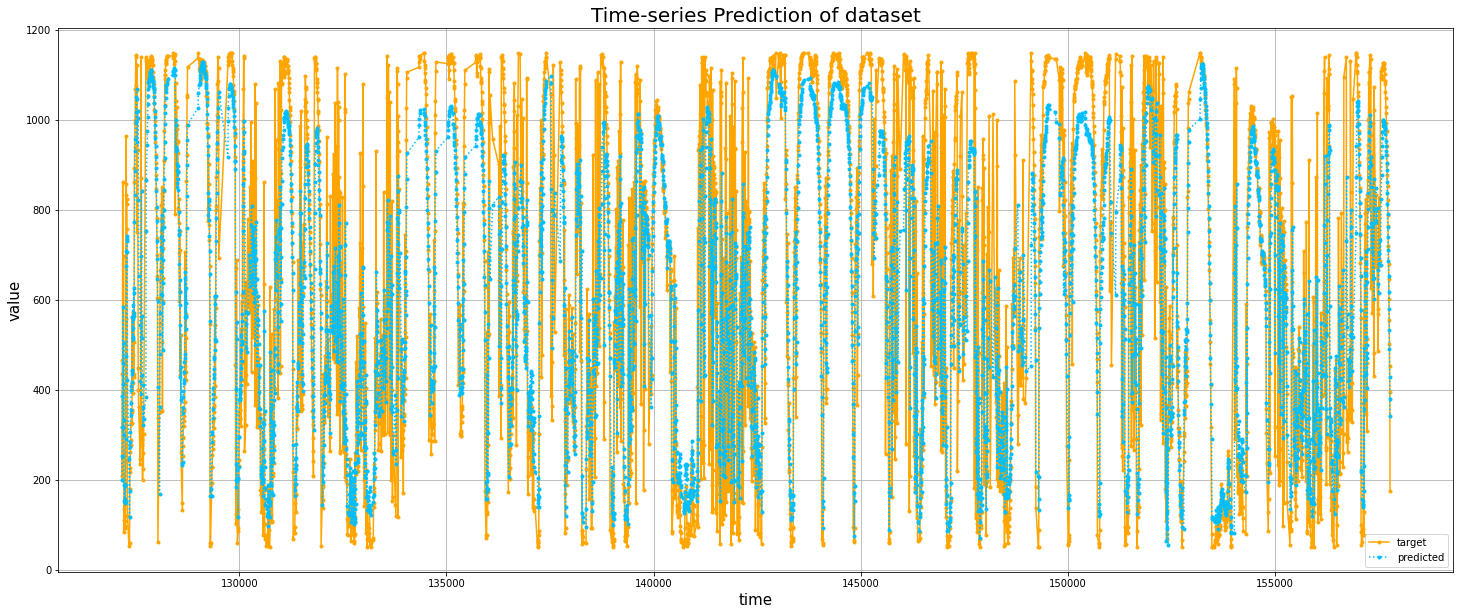

Prediction plot is saved to./predictionPlot.png


In [58]:
#algorithm= net.name
plt.figure(figsize=(25,10))
targetPlot,=plt.plot(df_final.TS1_P1_data,label='target',color='orange',marker='.',linestyle='-')
predictedPlot,=plt.plot(df_final.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':')
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('value',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, predictedPlot])
plt.title('Time-series Prediction of dataset',fontsize=20,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

In [59]:
df_final

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
127165,210,20,1007,85,17,195,6.037677,5.248472,0.629320,-0.777146,0.908858,-0.417107,200.448058
127170,317,20,1007,87,17,274,0.000000,0.000000,0.406737,-0.913545,0.908558,-0.417758,252.627630
127175,437,22,1007,88,17,315,5.663884,6.994314,0.156434,-0.987688,0.908259,-0.418409,318.168442
127180,466,23,1006,88,17,343,2.298133,1.928363,-0.104528,-0.994522,0.907959,-0.419060,386.903057
127185,864,24,1006,87,17,346,3.216089,10.519352,-0.358368,-0.933580,0.907658,-0.419711,414.017292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157760,556,33,1010,62,23,91,-3.018838,-2.624236,-0.104528,0.994522,0.624294,-0.781190,534.615775
157765,503,32,1010,63,23,74,-13.991472,0.488593,0.156434,0.987688,0.623734,-0.781637,490.582549
157770,454,32,1010,63,23,60,-18.895916,1.986041,0.406737,0.913545,0.623173,-0.782084,428.803194
157775,396,31,1010,63,23,51,-13.993915,-7.756954,0.629320,0.777146,0.622612,-0.782530,381.442223


In [60]:
pred=df_final['pred']
power=df_final['TS1_P1_data']

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 135.1518
Root Mean Square Error: 190.1508
Root Mean Square Error_LOG: 5.2478
Mean Square Error: 36157.3385
r_2 score:0.5849
MAPE score:28.7896

